In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
avocado_info = pd.read_csv('avocado_info.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'avocado_info.csv'

In [4]:
avocado_info = pd.read_csv('Exercise Files/avocado_info.csv')

In [5]:
avocado_info

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False
...,...,...
1169,125,False
1170,136,True
1171,125,False
1172,108,False


In [6]:
avocado_info.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


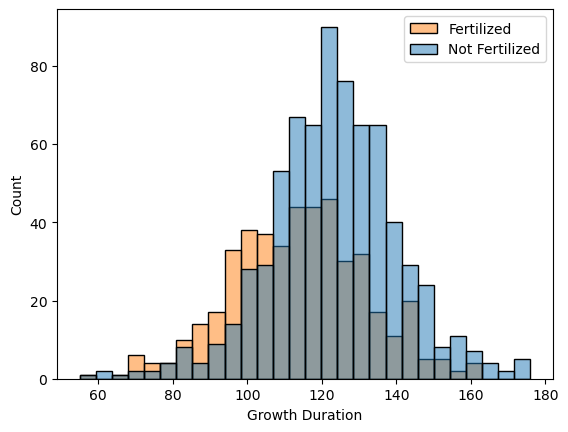

In [9]:
sns.histplot(data = avocado_info, x = 'Growth Duration', hue = 'Fertilizer')
plt.legend([ 'Fertilized', 'Not Fertilized' ])
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
avocado_info = pd.read_csv('Exercise Files/avocado_info.csv')

In [13]:
avocado_info.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


In [16]:
fertilized = avocado_info.loc[avocado_info["Fertilizer"] == True

not_fertilized = avocado_info.loc[avoccado_info["Fertilizer"] == False

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3089572194.py, line 1)

In [18]:
fertilized = avocado_info.loc[avocado_info["Fertilizer"] == True]
not_fertilized = avocado_info.loc[avocado_info["Fertilizer"] == False]

In [20]:
observed_test_stat = np.mean(fertilized["Growth Duration"]) - np.mean(not_fertilized["Growth Duration"])
observed_test_stat

np.float64(-9.266142572024918)

In [21]:
avocado_info[ "Growth Duration"].sample(frac = 1)

1048    133
56      129
543     116
561     101
967     110
       ... 
160     127
253     112
801     115
122      82
934     124
Name: Growth Duration, Length: 1174, dtype: int64

In [22]:
avocado_info["Growth Duration"].sample(frac = 1).reset_index()

,index,Growth Duration
0,804,95
1,759,94
2,674,131
3,431,129
4,1027,129
...,...,...
1169,182,108
1170,318,94
1171,24,122
1172,262,124


In [23]:
avocado_info["Growth Duration"].sample(frac = 1).reset_index(drop = True)

0       158
1       132
2        97
3       129
4       117
       ... 
1169    100
1170    118
1171    116
1172    136
1173    147
Name: Growth Duration, Length: 1174, dtype: int64

In [24]:
def perm(data): 
    return data.sample(frac = 1).reset_index(drop = True)

In [27]:
sim_test_stat = np.array([])
reps = 10000
for i in range (reps):
    perm_info = perm(avocado_info["Growth Duration"])
    df = pd.DataFrame({"Permuted Duration": perm_info, "Fertilizer": avocado_info["Fertilizer"]})
    fertilized = df.loc[df["Fertilizer"] == True, "Permuted Duration"]
    not_fertilized = df.loc[df["Fertilizer"] == False, "Permuted Duration"]
    stat = np.mean(fertilized) -np.mean(not_fertilized)
    sim_test_stat = np.append(sim_test_stat, stat)

In [28]:
sim_test_stat

array([-0.05829943, -1.07066136,  1.07568902, ...,  0.37454789,
        0.64641894,  1.51211359])

In [29]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stat) / reps

In [30]:
p_value

0.0